In [1]:
from datetime import date, timedelta
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [3]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [4]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [5]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [6]:
sbux = repo.historical_daily('SBUX', start=start, end=end)

In [8]:
sbux = returns(sbux)

In [9]:
values = sbux['return'].astype(float).dropna().to_numpy()

In [10]:
m = values.mean()
s = values.std(ddof=1)

In [11]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

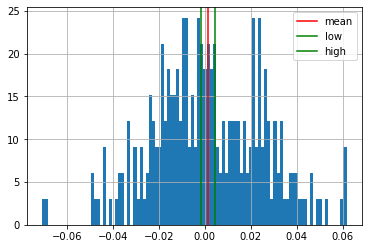

In [12]:
sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend();

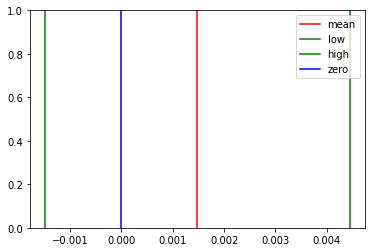

In [14]:
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.axvline(0, label='zero', color='blue');
plt.legend();